In [72]:
from implementations.vanila import create_fractal as create_fractal_vanila
from implementations.numba import create_fractal as create_fractal_numba
from implementations.numba_parallel import create_fractal as create_fractal_numba_parallel
from implementations.numba_vectorize import create_fractal as create_fractal_numba_vectorize
from implementations.numba_cuda import create_fractal as create_fractal_numba_cuda
from timeit import default_timer as timer
from matplotlib.pylab import imshow, show
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('..')
from utils import plot_multiple_bars

In [23]:
%%timeit -n 1 -r 1 -o

image = np.zeros((500 * 10, 750 * 10), dtype=np.uint8)
create_fractal_vanila(-2.0, 1.0, -1.0, 1.0, image, 1)

26.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 26.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [25]:
vanila_time = _

In [27]:
%%timeit -n 1 -r 10 -o

image = np.zeros((500 * 10, 750 * 10), dtype=np.uint8)
create_fractal_numba(-2.0, 1.0, -1.0, 1.0, image, 20)

949 ms ± 2.53 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


<TimeitResult : 949 ms ± 2.53 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)>

In [28]:
numba_time = _

In [80]:
%%timeit -n 1 -r 10 -o

image = np.zeros((500 * 10, 750 * 10), dtype=np.uint8)
create_fractal_numba_parallel(-2.0, 1.0, -1.0, 1.0, image, 20)

327 ms ± 3.11 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


<TimeitResult : 327 ms ± 3.11 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)>

In [81]:
numba_parallel_time = _

In [78]:
%%timeit -n 1 -r 100 -o

width, height = 500 * 10, 750 * 10
image = create_fractal_numba_vectorize(-2.0, 1.0, -1.0, 1.0, width, height, 20)
image = image.reshape(width, height)

83.2 ms ± 2.76 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


<TimeitResult : 83.2 ms ± 2.76 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)>

In [79]:
numba_vectorize_time = _

In [66]:
%%timeit -n 1 -r 100 -o

width, height = 500 * 10, 750 * 10
image = np.zeros((width, height), dtype=np.uint8)

pixels = width * height
nthreads = 32
nblocksy = (width // nthreads) + 1
nblocksx = (height // nthreads) + 1

create_fractal_numba_cuda[(nblocksx, nblocksy), (nthreads, nthreads)](
    -2.0, 1.0, -1.0, 1.0, image, 20
)

45.2 ms ± 2.78 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


<TimeitResult : 45.2 ms ± 2.78 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)>

In [67]:
numba_cuda_time = _

In [87]:
time_results = {'numba': numba_time, 'numba parallel': numba_parallel_time, 'numba vectorize cuda': numba_vectorize_time,'numba jit cuda': numba_cuda_time,}

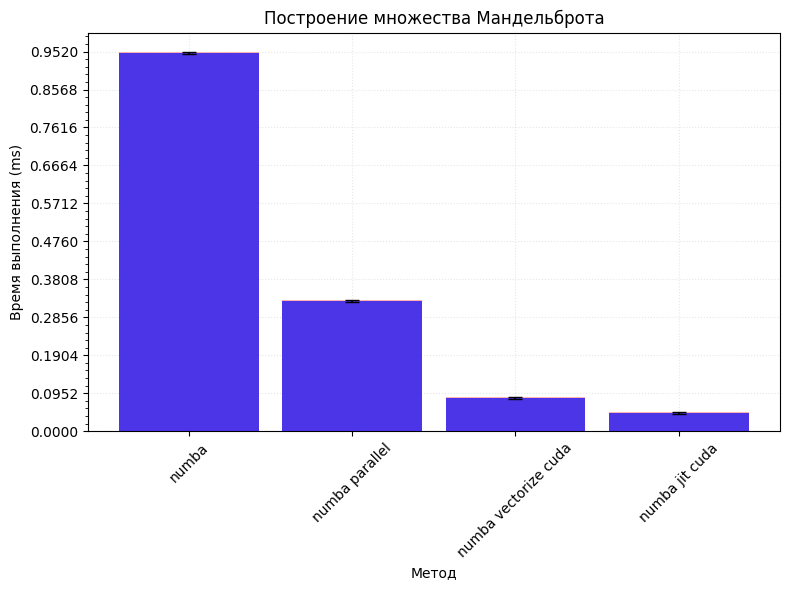

In [88]:
plot_multiple_bars(time_results, title='Построение множества Мандельброта', y_title = 'Время выполнения (ms)')

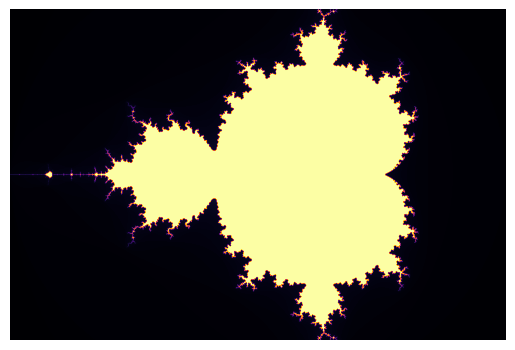

In [70]:
width, height = 500 * 10, 750 * 10
image = np.zeros((width, height), dtype=np.uint8)

pixels = width * height
nthreads = 32
nblocksy = (width // nthreads) + 1
nblocksx = (height // nthreads) + 1
s = timer()

create_fractal_numba_cuda[(nblocksx, nblocksy), (nthreads, nthreads)](
    -2.0, 1.0, -1.0, 1.0, image, 20
)

plt.axis('off')
imshow(image, cmap='inferno')
show()